# Specaugment examples

Audio data augmentation based on time warping and time and
frequency masking.

*Park, Daniel S., et al.<br>
"Specaugment: A simple data augmentation method for automatic speech recognition."<br>
arXiv preprint arXiv:1904.08779 (2019).*

In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt

from phaunos_ml.utils.dataug_utils import time_warp, time_mask, frequency_mask

tf.enable_eager_execution()

In [2]:
# load image
img = tf.keras.preprocessing.image.load_img('data/lenna.png')
data = tf.keras.preprocessing.image.img_to_array(img)

In [3]:
# add batch dimension so that shape is (batch_size, height, width, channels)
data = np.expand_dims(data, 0)

## Time warp

In [4]:
# add a vertical line to rdata in the middle as a reference
rdata = np.copy(data)
rdata[0,:,254:256,:] = 1

In [5]:
# process
warped_data = time_warp(rdata, 150)

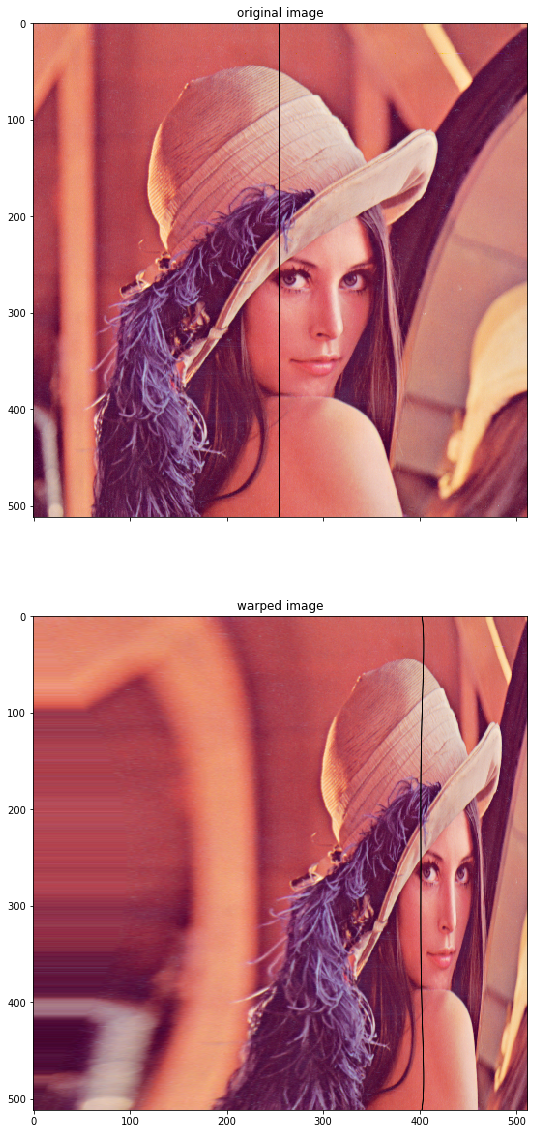

In [6]:
# plot
fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(20, 20))
axs[0].set_title('original image')
axs[0].imshow(rdata[0]/255.)

axs[1].set_title('warped image')
axs[1].imshow(warped_data[0]/255.)
plt.show()

## Time and frequency masking

In [7]:
tmasked_data = time_mask(data, 30)
fmasked_data = frequency_mask(data, 30)

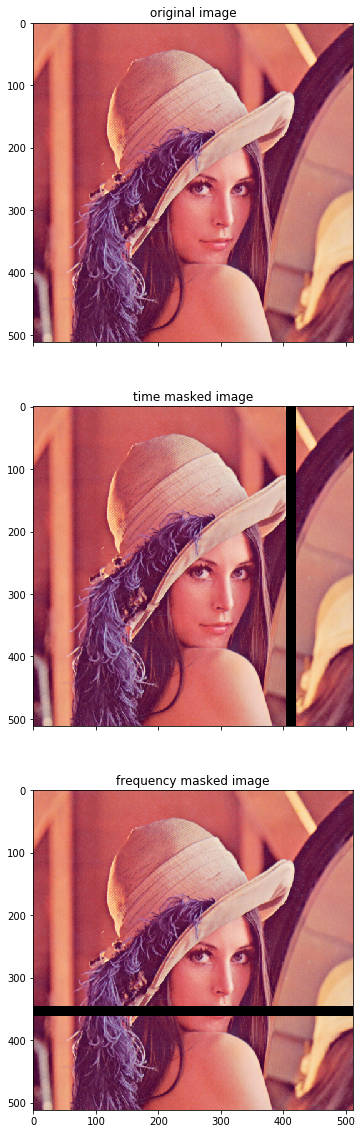

In [8]:
# plot
fig, axs = plt.subplots(nrows=3, sharex=True, figsize=(20, 20))
axs[0].set_title('original image')
axs[0].imshow(data[0]/255.)

axs[1].set_title('time masked image')
axs[1].imshow(tmasked_data[0]/255.)

axs[2].set_title('frequency masked image')
axs[2].imshow(fmasked_data[0]/255.)
plt.show()